In [1]:
#resolution low

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from keras.datasets import cifar10 #data already contained within keras
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

Using TensorFlow backend.


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape #each image has a target class associated with it

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

[7]


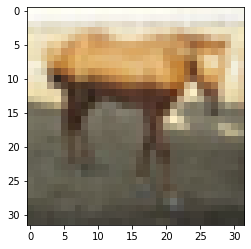

In [8]:
i=2000
plt.imshow(X_train[i])
print(y_train[i])

/home/ds/.local/lib/python3.6/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


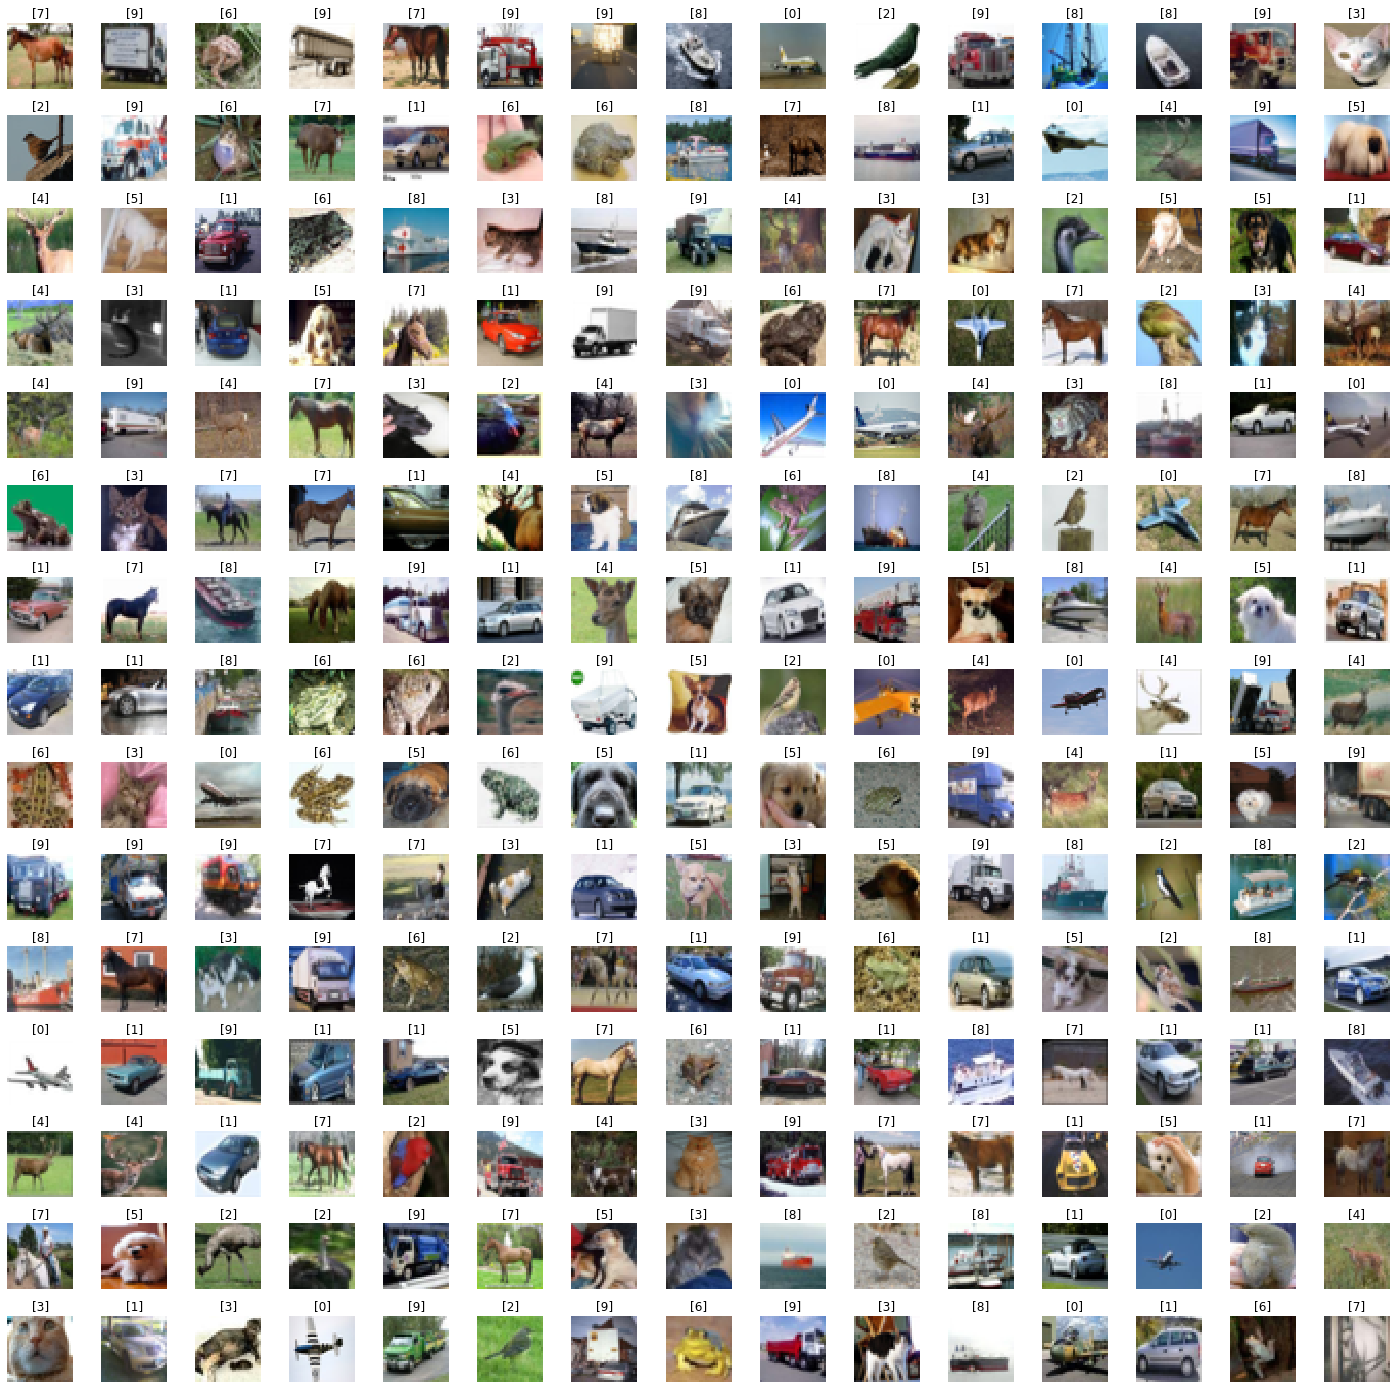

In [9]:
w_grid = 15
l_grid = 15

fig,axes=plt.subplots(l_grid,w_grid, figsize = (25,25))
axes = axes.ravel()

n_training= len(X_train)

#to plot images in the above grid 
for i in np.arange(0,l_grid*w_grid):
    index = np.random.randint(0, n_training) #to pick a random no
    axes[i].imshow(X_train[index])
    axes[i].axis('off')
    axes[i].set_title(y_train[index])#actual label corresponding to that image
plt.subplots_adjust(hspace = 0.4)    

In [10]:
#data preparation
#convert images into float type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
number_cat = 10

In [12]:
y_train #actual classes is a decimal values, but we need to convert into binary

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
import keras
y_train= keras.utils.to_categorical(y_train,number_cat)

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
 y_test = keras.utils.to_categorical(y_test, number_cat)

In [16]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [17]:
#data normalization
#convert value fro 0-255 to just 0-1
X_train = X_train/255
X_test = X_test/255

In [18]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [19]:
X_train.shape

(50000, 32, 32, 3)

In [20]:
Input_shape = X_train.shape[1:]#get only the dimensions (32,32,3)


In [21]:
Input_shape

(32, 32, 3)

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [23]:
import tensorflow as tf
with tf.device('/gpu:0'):
    cnn_model = Sequential()
    cnn_model.add(Conv2D(filters = 32, kernel_size=(3,3), activation = 'relu',input_shape = (Input_shape) ))
    cnn_model.add(Conv2D(filters = 32, kernel_size=(3,3), activation = 'relu'))
    cnn_model.add(MaxPooling2D(2,2))
    cnn_model.add(Dropout(0.3))

    cnn_model.add(Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu'))
    cnn_model.add(Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu'))
    cnn_model.add(MaxPooling2D(2,2))
    cnn_model.add(Dropout(0.2))
              
    cnn_model.add(Flatten())
    cnn_model.add(Dense(units = 512, activation = 'relu'))
    cnn_model.add(Dense(units = 512, activation = 'relu'))

    cnn_model.add(Dense(units = 10, activation = 'softmax' ))#relu generates regular outputs,softmax generates 0/1

    
    

              

              


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr = 0.001),metrics = ['accuracy'] )

In [25]:
history = cnn_model.fit(X_train,y_train, batch_size = 32, epochs = 2, shuffle = True)


Instructions for updating:
Use tf.cast instead.
Epoch 1/2
50000/50000 [==============================] - 37s 731us/step - loss: 1.5624 - acc: 0.4356
Epoch 2/2
50000/50000 [==============================] - 38s 756us/step - loss: 1.1300 - acc: 0.6047
